## Machine Learning Introduction 2

$$\begin{align} \mathbb{E}\big[(Y - \hat Y)^2\big] & = \mathbb{E}\big[(f(x) + \epsilon - \hat f(x))^2\big] \\
& = \mathbb{E}\big[(f(x) - \hat f(x))^2\big] + 2\mathbb{E}\big[\epsilon \big]\mathbb{E}\big[f(x) - \hat f(x)\big] + \mathbb{E}\big[\epsilon^2\big] \\
& = \mathbb{E}\big[(f(x) - \hat f(x))^2\big] + \text{Var}\big[\epsilon\big] \\
& = \mathbb{E}\big[f(x)\big]
\end{align}$$

### Expectation of Test MSE

$$\begin{align} E[(Y - \hat f(x))^2] & = E[(\hat f(x) - f(x))^2] + Var(\epsilon) \\
& = E[(\hat f(x) - E[\hat f(x)] + E[\hat f(x)] - f(x))^2] + Var(\epsilon) \\
& = E[(\hat f(x) - E[\hat f(x)])^2] + (E[\hat f(x)] - f(x))^2 + 2E[\hat f(x) - E[\hat f(x)]]E[\hat f(x) - f(x)] + Var(\epsilon) \\
& = Var(\hat f(x_0)) + Bias(f(x_0), \hat f(x_0))^2 + Var(\epsilon)
\end{align}$$

> 모형이 복잡해지면 예측편차는 작아지지만, 예측치의 분산 텀이 커지게 된다.

### 평가 측도

`-` Classification

* 오류율(error rate)

$$\frac1n \overset{n}{\sum} I(y_i \neq \hat y_i)$$

> 평가자료에서의 오류율을 최소화하는 것이 목표가 된다.

다음을 최대화하는 방식으로 분류하는 것이 평가자료의 오류율을 최소화시킴이 알려져 있다.

$$Pr(Y = j | X = x_0)$$

* 베이즈 분류기

이진분류의 경우 $Pr(Y = 1 | X = x_0) > 0.5$를 만족할 때, 1로 분류하는 것을 의미한다. 틀릴 확률이 가장 적은, 예측 오차가 가장 작은 분류.

> 베이즈 분류기를 실제로 얻는 것은 불가능하다. 모집단의 조건부 분포를 모르기 때문. 확률을 다 알았을 때 생기는 최소한의 오차가 베이즈 에러
>
> **우리가 분류를 할 때, 최선의 결과에서 나올 수 있는 예측오차 : 베이즈 에러**
>
> 정확한 확률을 몰라도 베이즈 에러를 따라갈 수 있는 가능성이 있다. 어떤 형태로든 베이즈 에러에 가깝게 가는 현상.

신기한 현상.

뉴럴 네트워크에서 Training Error가 0이여도 계속 학습을 시키면 Test Error가 오히려 더 줄어드는 결과가 존재한다.

## 1. 라이브러리 imports

In [2]:
import pandas as pd
import numpy as np

## 2. 파이썬 기초

In [4]:
## 상관계수의 확인
x = np.random.normal(size = 50)
y = x + np.random.normal(loc = 50, scale = 1, size = 50)
np.corrcoef(x, y)

array([[1.        , 0.52722028],
       [0.52722028, 1.        ]])

In [5]:
## 난수 생성 및 시드 지정
rng = np.random.default_rng(1303)
print(rng.normal(scale = 5, size = 10))

rng2 = np.random.default_rng(1330)
print(rng2.normal(scale = 5, size = 10))

rng = np.random.default_rng(3)
y = rng.standard_normal(10)
print(y)
np.mean(y), y.mean()

[  4.09482632  -1.07485605 -10.15364596   1.13406146  -4.14030566
  -4.74859823   0.48740125   5.65355173  -2.51588502  -8.07334198]
[ 1.83969393  1.26060195  1.8241157   1.7828998  -1.61536633 -1.84860455
  7.97028422 -8.87272153 -2.24243852  9.15779778]
[ 2.04091912 -2.55566503  0.41809885 -0.56776961 -0.45264929 -0.21559716
 -2.01998613 -0.23193238 -0.86521308  3.32299952]


(-0.1126795190952861, -0.1126795190952861)

In [7]:
## y의 분산을 확인
print(np.var(y), y.var())
np.mean((y - y.mean())**2)

2.7243406406465125 2.7243406406465125


2.7243406406465125

## 3. 그래프

In [8]:
import matplotlib.pyplot as plt

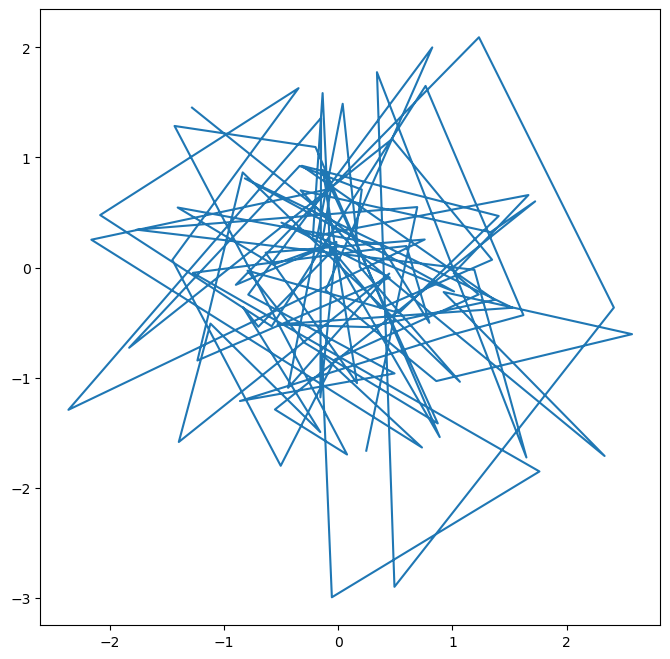

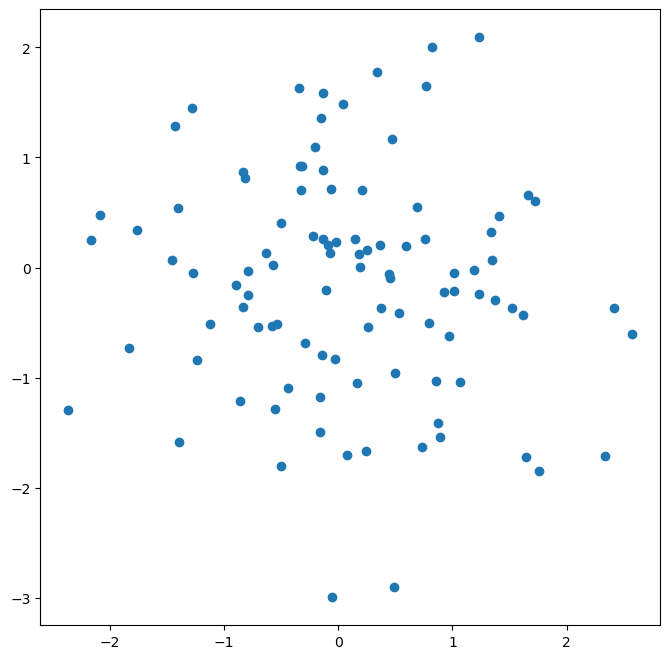

In [13]:
fig, ax = plt.subplots(figsize = (8, 8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y);

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y, 'o');

`-` 산점도에 scatter 구문을 이용하여 처리

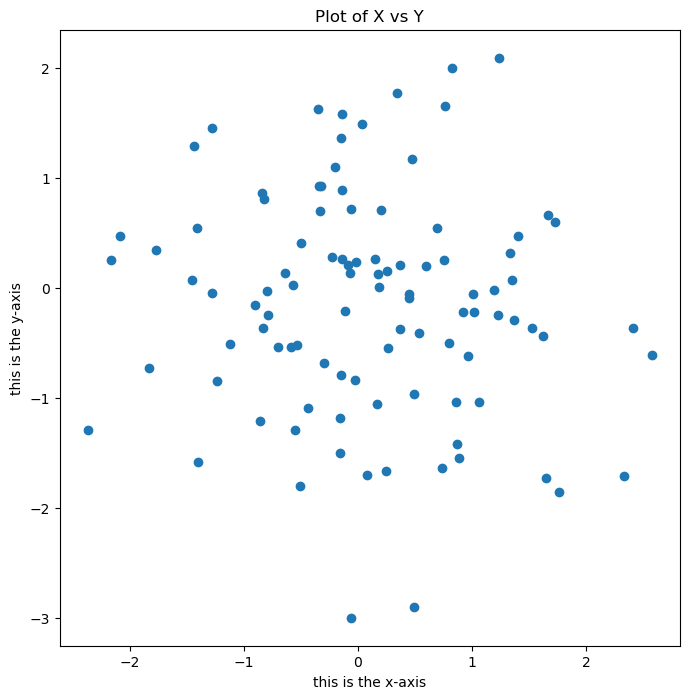

In [14]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(x, y, marker='o')
ax.set_xlabel("this is the x-axis")  ## axis labeling
ax.set_ylabel("this is the y-axis")
ax.set_title("Plot of X vs Y");

`-` 행렬 플랏, axes응 이용하여 처리

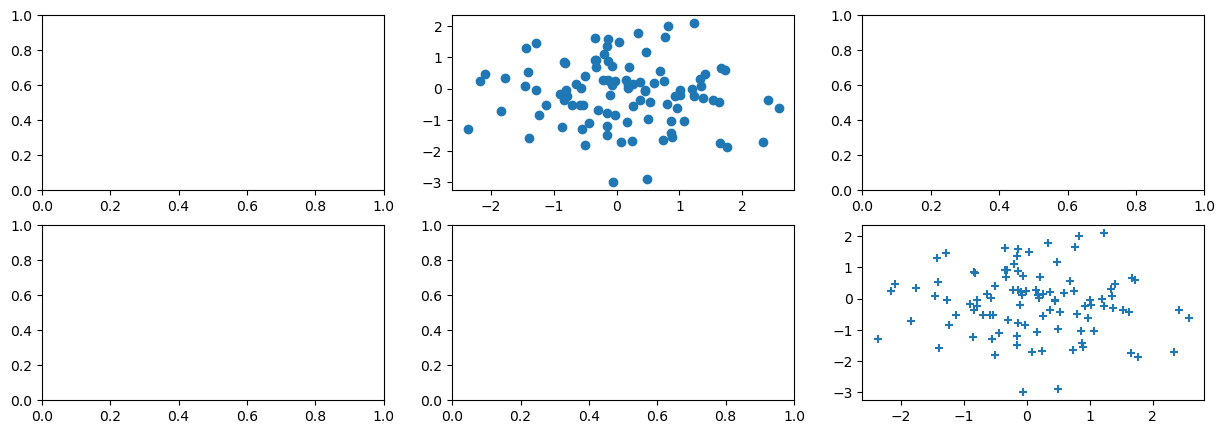

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 5))
axes[0, 1].plot(x, y, 'o')
axes[1, 2].scatter(x, y, marker = '+')
fig.show()

## saving image
#fig.savefig("Figuer.png", dpi = 400)

`-` 등고선도

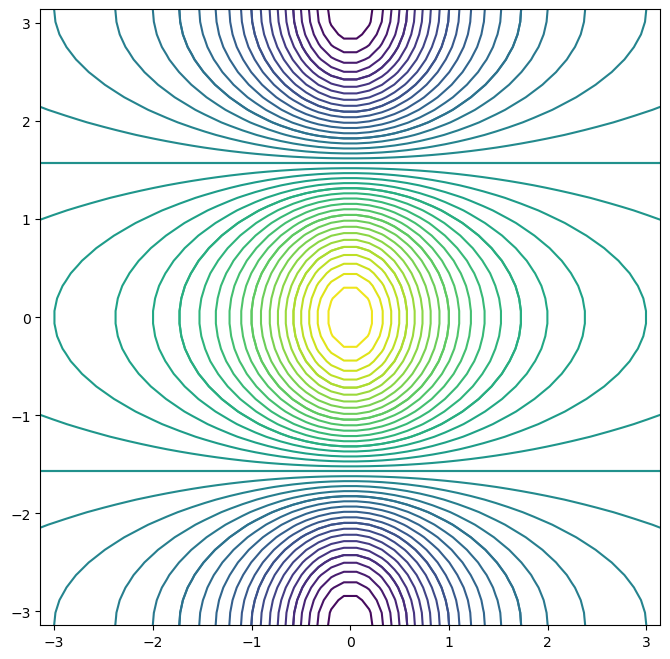

In [19]:
# CONTOUR: 3차원의 등고선 그래프
# ------------------------------
fig, ax = plt.subplots(figsize=(8, 8))
x = np.linspace(-np.pi, np.pi, 50)
y=x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2)) # z = f(x,y)
ax.contour(x, y, f);
ax.contour(x, y, f, levels=45);

## 4. 데이터프레임 조작

In [21]:
A = np.array(np.arange(16)).reshape((4, 4))
A ## column wide

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

`-` 멀티 리스트 인덱싱

In [23]:
print(A[[1, 3]][:, [0, 2]])

[[ 4  6]
 [12 14]]


`-` 판다스 데이터 로드

In [26]:
Auto = pd.read_csv('~/ML2024/data/Data/Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


`-` 간단한 데이터 엔지니어링

In [27]:
print(np.unique(Auto['horsepower'])) ## 대충 map으로 '?'를 NA로 바꾼 뒤 자료형 조절해야 할듯

Auto_new = Auto.dropna()
print(Auto.shape)
print(Auto_new.shape)

Auto_re = Auto.set_index('name')
Auto_re

['100' '102' '103' '105' '107' '108' '110' '112' '113' '115' '116' '120'
 '122' '125' '129' '130' '132' '133' '135' '137' '138' '139' '140' '142'
 '145' '148' '149' '150' '152' '153' '155' '158' '160' '165' '167' '170'
 '175' '180' '190' '193' '198' '200' '208' '210' '215' '220' '225' '230'
 '46' '48' '49' '52' '53' '54' '58' '60' '61' '62' '63' '64' '65' '66'
 '67' '68' '69' '70' '71' '72' '74' '75' '76' '77' '78' '79' '80' '81'
 '82' '83' '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95'
 '96' '97' '98' '?']
(397, 9)
(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


`-` 데이터프레임 슬라이싱

In [30]:
Auto_re.loc[['amc rebel sst', 'ford torino']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [32]:
Auto_re.iloc[1:5, [0, 2, 3]]

,mpg,displacement,horsepower
name,,,
buick skylark 320,15.0,350.0,165
plymouth satellite,18.0,318.0,150
amc rebel sst,16.0,304.0,150
ford torino,17.0,302.0,140


In [33]:
print(Auto_re.loc[lambda df: (df['year'] > 80) & (df['mpg'] > 30),['weight', 'origin']])

                                   weight  origin
name                                             
toyota starlet                       1755       3
plymouth champ                       1875       1
honda civic 1300                     1760       3
subaru                               2065       3
datsun 210 mpg                       1975       3
toyota tercel                        2050       3
mazda glc 4                          1985       3
plymouth horizon 4                   2215       1
ford escort 4w                       2045       1
volkswagen jetta                     2190       2
renault 18i                          2320       2
honda prelude                        2210       3
toyota corolla                       2350       3
datsun 200sx                         2615       3
mazda 626                            2635       3
volvo diesel                         3160       2
chevrolet cavalier 2-door            2395       1
pontiac j2000 se hatchback           2575       1


## 5. 데이터 처리

In [34]:
# 가중평균 및 결측치 생성
# -----------------------

# zip 구문을 이용한 가중평균 계산
total = 0
for value, weight in zip([2,3,19],[0.2,0.3,0.5]):
  total += weight * value
  print('Weighted average is: {0}'.format(total))

# M에서 np.nan을 선택, 임의의 결측치 생성
rng = np.random.default_rng(1)
A = rng.standard_normal((127, 5))
M = rng.choice([0, np.nan], p=[0.8,0.2], size=A.shape) ## Bernoulli
A += M ## 20%를 결측치로 대체
D = pd.DataFrame(A, columns=['food','bar', 'pickle', 'snack', 'popcorn'])
print(D[:3])

for col in D.columns:
  template = 'Column "{0}" has {1:.2%} missing values'
  print(template.format(col, np.isnan(D[col]).mean()))
  #print format 0: col, 1: np.isnan(D[col]).mean()
  #col-colname

Weighted average is: 0.4
Weighted average is: 1.2999999999999998
Weighted average is: 10.8
       food       bar    pickle     snack   popcorn
0  0.345584  0.821618  0.330437 -1.303157       NaN
1       NaN -0.536953  0.581118  0.364572  0.294132
2       NaN  0.546713       NaN -0.162910 -0.482119
Column "food" has 16.54% missing values
Column "bar" has 25.98% missing values
Column "pickle" has 29.13% missing values
Column "snack" has 21.26% missing values
Column "popcorn" has 22.83% missing values


In [39]:
for col in D.columns:
    print(f"Column {col} has {np.isnan(D[col]).mean():.2%} missing values") ## f-string이 편하긴 함 ㅇㅇ

Column food has 16.54% missing values
Column bar has 25.98% missing values
Column pickle has 29.13% missing values
Column snack has 21.26% missing values
Column popcorn has 22.83% missing values


`-` 상호 관계를 알기 위한 산점도

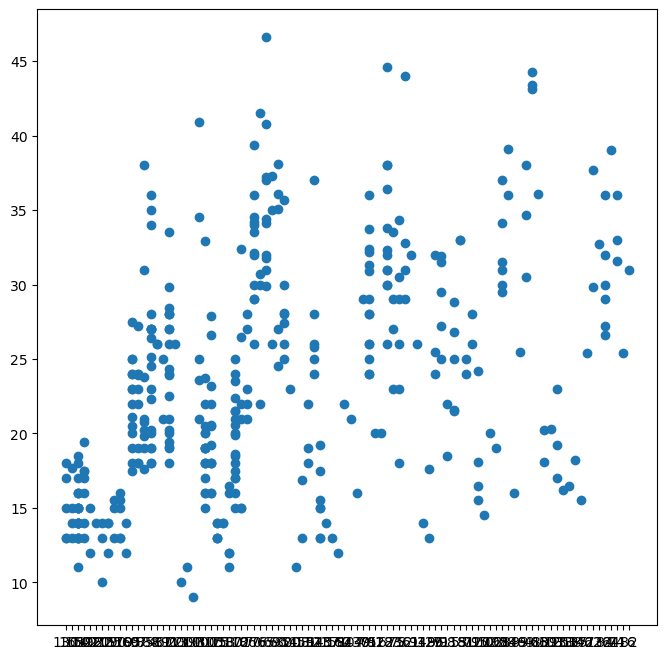

In [44]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o'); ## 아 몰랑 기억 안나